# Обучение нейросети

In [228]:
import os, tensorflow as tf, numpy as np, pandas as pd

from tensorflow import keras
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [230]:
SIZE_IMAGE = (150, 150)

In [232]:
# Функция для создания списка с путями фото

def create_list_paths(name_folder: str) -> list[str]:
    path = f'./images/{name_folder}'
    if os.path.exists(path):
        return [f'{path}/{image}' for image in os.listdir(path)]
    return []

In [234]:
# Функция для создания numpy массива из фото

def create_array_from_image(list_paths: list[str]) -> np.array:
    output_list = []
    for path in list_paths:
        if os.path.exists(path):
            image = Image.open(path).convert('L')
            image = ImageOps.fit(image, SIZE_IMAGE, Image.Resampling.LANCZOS)
            output_list.append(np.asarray(image))
            # output_list = np.append(output_list, np.asarray(Image.open(path).convert('L')))
    return output_list

In [236]:
dict_key = {
    'cat' : 0,
    'dog' : 1,
    'guinea_pig' : 2,
    'cow' : 3,
    'chamomile' : 4,
    'rose' : 5,
    'bell' : 6,
    'tilip' : 7,
    'circle' : 8,
    'triangle' : 9,
    'rectangle' : 10,
    'square' : 11
}

In [238]:
X = []
y = []

In [240]:
for key in dict_key.keys():
    list_paths = create_list_paths(key)
    list_array = create_array_from_image(list_paths)
    X.extend(list_array)
    y.extend([dict_key[key] for _ in range(len(list_array))])

In [241]:
len(X)

11965

In [242]:
len(y)

11965

In [243]:
X = np.array(X, dtype=np.uint8)
y = np.array(y, dtype=np.uint8)

In [244]:
X.shape, y.shape

((11965, 221, 221), (11965,))

In [245]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [246]:
x_train.shape, x_test.shape

((8016, 221, 221), (3949, 221, 221))

In [247]:
y_train.shape, y_test.shape

((8016,), (3949,))

In [248]:
x_train = x_train / 255
x_test = x_test / 255

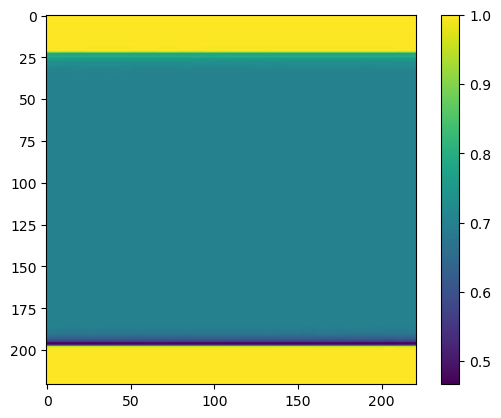

In [296]:
plt.figure()
plt.imshow(x_train[13])
plt.colorbar()
plt.grid(False)
plt.show()

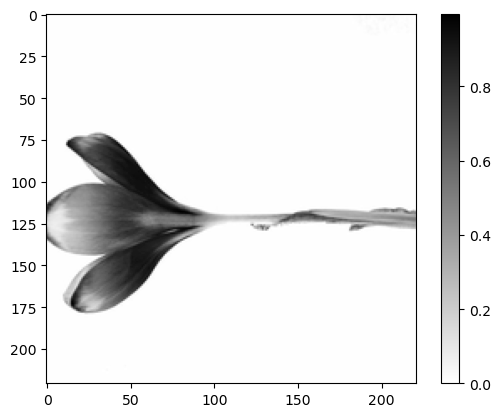

In [250]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [251]:
model = keras.Sequential([keras.layers.Flatten(input_shape=SIZE_IMAGE),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(12, activation='softmax')])

In [252]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [253]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 48841)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,251,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,253,324 (23.85 MB)

 Trainable params: 6,253,324 (23.85 MB)

 Non-trainable params: 0 (0.00 B)

In [254]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0812 - loss: 2.6632
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0941 - loss: 2.4827
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1015 - loss: 2.4760
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1095 - loss: 2.4676
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1169 - loss: 2.4571
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1195 - loss: 2.4396
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.1299 - loss: 2.4194
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1360 - loss: 2.4000
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.1475 - loss: 2.3908
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1483 - loss: 2.3846


In [255]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}\nTest loss: {test_loss}')

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1329 - loss: 2.4027
Test accuracy: 0.13294504582881927
Test loss: 2.402684450149536


In [ ]:
predictions = model.predict(x_train)

In [ ]:
np.argmax(predictions[0])

In [ ]:
y_train[0]

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)